In [1]:
# Necessary imports
import os, cv2, random
import numpy as np
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [2]:
TRAIN_DIR = 'train/'
TEST_DIR = 'test/'


LABELS = 2 # Number of different types of labels (1-10)
IMAGE_SIZE = 150; # 150x150.  Also, 224, 96, 64, and 32 are also common
CHANNELS = 3
pixel_depth = 255.0  # Number of levels per pixel.
LR = 0.0001 # Learning rate

# Load Data
Create a list of test and training images. We share dogs and cats to create a set in which we will share them equally.

In [3]:
TRAINING_AND_VALIDATION_SIZE_DOGS = 12500
TRAINING_AND_VALIDATION_SIZE_CATS = 12500
TRAINING_AND_VALIDATION_SIZE_ALL  = 25000
TEST_SIZE_ALL = 10



train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] 
train_dogs =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
train_cats =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]
test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]

train_images = train_dogs[:TRAINING_AND_VALIDATION_SIZE_DOGS] + train_cats[:TRAINING_AND_VALIDATION_SIZE_CATS]
train_labels_1dim = np.array ((['dogs'] * TRAINING_AND_VALIDATION_SIZE_DOGS) + (['cats'] * TRAINING_AND_VALIDATION_SIZE_CATS))
test_images =  test_images[:TEST_SIZE_ALL]
test_labels = np.array (['unknownclass'] * TEST_SIZE_ALL)

print(train_images[30:50])
test_images

['train/dog.10023.jpg', 'train/dog.10024.jpg', 'train/dog.10025.jpg', 'train/dog.10026.jpg', 'train/dog.10027.jpg', 'train/dog.10028.jpg', 'train/dog.10029.jpg', 'train/dog.1003.jpg', 'train/dog.10030.jpg', 'train/dog.10031.jpg', 'train/dog.10032.jpg', 'train/dog.10033.jpg', 'train/dog.10034.jpg', 'train/dog.10035.jpg', 'train/dog.10036.jpg', 'train/dog.10037.jpg', 'train/dog.10038.jpg', 'train/dog.10039.jpg', 'train/dog.1004.jpg', 'train/dog.10040.jpg']


['test/1.jpg',
 'test/10.jpg',
 'test/100.jpg',
 'test/1000.jpg',
 'test/10000.jpg',
 'test/10001.jpg',
 'test/10002.jpg',
 'test/10003.jpg',
 'test/10004.jpg',
 'test/10005.jpg']

# Data pre-processing
Read the images, reduce them to a size of 100 * 100 and convert them into an array. Normalize our data. 
Reshaping into image shape: (# images, # vertical height, # horizontal width, # colors)


In [4]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    if (img.shape[0] >= img.shape[1]): # height is greater than width
        resizeto = (IMAGE_SIZE, int (round (IMAGE_SIZE * (float (img.shape[1])  / img.shape[0]))));
    else:
        resizeto = (int (round (IMAGE_SIZE * (float (img.shape[0])  / img.shape[1]))), IMAGE_SIZE);
    
    img2 = cv2.resize(img, (resizeto[1], resizeto[0]), interpolation=cv2.INTER_CUBIC)
    img3 = cv2.copyMakeBorder(img2, 0, IMAGE_SIZE - img2.shape[0], 0, IMAGE_SIZE - img2.shape[1], cv2.BORDER_CONSTANT, 0)
        
    return img3[:,:,::-1]  # turn into rgb format

def prep_data(images):
    count = len(images)
    data = np.ndarray((count, IMAGE_SIZE, IMAGE_SIZE, CHANNELS), dtype=np.float32)

    for i, image_file in enumerate(images):
        image = read_image(image_file);
        image_data = np.array (image, dtype=np.float32);
        image_data[:,:,0] = (image_data[:,:,0].astype(float) - pixel_depth / 2) / pixel_depth
        image_data[:,:,1] = (image_data[:,:,1].astype(float) - pixel_depth / 2) / pixel_depth
        image_data[:,:,2] = (image_data[:,:,2].astype(float) - pixel_depth / 2) / pixel_depth
        
        data[i] = image_data; # image_data.T
        if i%250 == 0: print('Processed {} of {}'.format(i, count))    
    return data

train_normalized = prep_data(train_images)
test_normalized = prep_data(test_images)

print("Train shape: {}".format(train_normalized.shape))
print("Train shape: {}".format(test_normalized.shape))



Processed 0 of 25000
Processed 250 of 25000
Processed 500 of 25000
Processed 750 of 25000
Processed 1000 of 25000
Processed 1250 of 25000
Processed 1500 of 25000
Processed 1750 of 25000
Processed 2000 of 25000
Processed 2250 of 25000
Processed 2500 of 25000
Processed 2750 of 25000
Processed 3000 of 25000
Processed 3250 of 25000
Processed 3500 of 25000
Processed 3750 of 25000
Processed 4000 of 25000
Processed 4250 of 25000
Processed 4500 of 25000
Processed 4750 of 25000
Processed 5000 of 25000
Processed 5250 of 25000
Processed 5500 of 25000
Processed 5750 of 25000
Processed 6000 of 25000
Processed 6250 of 25000
Processed 6500 of 25000
Processed 6750 of 25000
Processed 7000 of 25000
Processed 7250 of 25000
Processed 7500 of 25000
Processed 7750 of 25000
Processed 8000 of 25000
Processed 8250 of 25000
Processed 8500 of 25000
Processed 8750 of 25000
Processed 9000 of 25000
Processed 9250 of 25000
Processed 9500 of 25000
Processed 9750 of 25000
Processed 10000 of 25000
Processed 10250 of 25

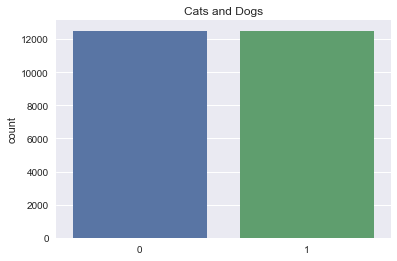

In [5]:
labels = []
for i in train_images:
    if 'dog' in i:
        labels.append(1)
    else:
        labels.append(0)

sns.countplot(labels)
sns.plt.title('Cats and Dogs')


# Visualize Data


dogs
dogs
dogs


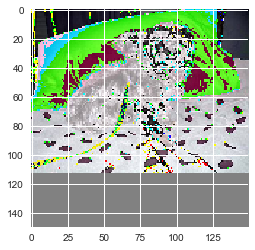

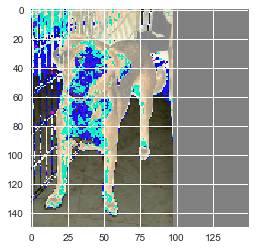

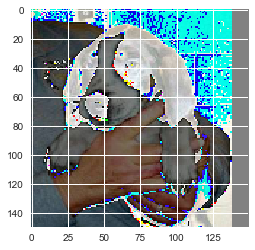

In [6]:
plt.imshow (train_normalized[0,:,:,:])
plt.figure ()
print(train_labels_1dim[0])
plt.imshow (train_normalized[1,:,:,:])
plt.figure ()
print(train_labels_1dim[1])
plt.imshow (train_normalized[2,:,:,:])
plt.figure ()
print(train_labels_1dim[2])


# One Hot Encoder
Convert our tags to one hot encode.

In [7]:
train_labels = LabelEncoder().fit_transform(train_labels_1dim)[:, None]
train_labels = OneHotEncoder().fit_transform(train_labels).todense()
print(train_labels.shape)
print(train_labels[1:10])

(25000, 2)
[[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]


# Data split
We divide our data into training and testing in the ratio 80/20. Also we mix them

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_normalized, train_labels, test_size=0.05, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.05, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(22562, 150, 150, 3)
(22562, 2)
(1250, 150, 150, 3)
(1250, 2)
(1188, 150, 150, 3)
(1188, 2)


# SOLUTION

Let's now build a cnn


**Layer 1:** Convolutional. The output shape should be 100x100x32.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 50x50x32.

**Layer 2:** Convolutional. The output shape should be 50x50x32.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 25x25x32.

**Layer 2:** Convolutional. The output shape should be 25x25x64.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 13x13x64.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. 

**Layer 3:** Fully Connected. This should have 64 outputs.

**Activation.** Your choice of activation function.

**Dropout:** Dropout Layer. 

**Layer 5:** Fully Connected (Logits). This should have 2 outputs.


In [9]:
sess = tf.InteractiveSession()    
def widht_init(shape):
    weight = tf.Variable(tf.truncated_normal(shape,stddev = 0.1))
    return weight

def bias_init(shape):
    bias = tf.Variable(tf.constant(0.1,shape=shape))
    return bias

def conv2d(x,W):
    return tf.nn.conv2d(x,W, strides=[1,1,1,1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='SAME')


def model(x,keep_prob):
    #first conv layer
    W1 = widht_init([3,3,3,32])
    b1 = bias_init([32])
    h1_conv = conv2d(x,W1)
    h1_conv = tf.nn.relu(h1_conv+b1)
    h1_conv = max_pool_2x2(h1_conv)
    print(h1_conv.shape)

    #second conv layer
    W2 = widht_init([3,3,32,32])
    b2 = bias_init([32])
    h2_conv = conv2d(h1_conv,W2)
    h2_conv = tf.nn.relu(h2_conv+b2)
    h2_conv = max_pool_2x2(h2_conv)
    print(h2_conv.shape)

    #еhird conv layer
    W3 = widht_init([3,3,32,64])
    b3 = bias_init([64])
    h3_conv = conv2d(h2_conv,W3)
    h3_conv = tf.nn.relu(h3_conv+b3)
    h3_conv = max_pool_2x2(h3_conv)
    print(h3_conv.shape)

    #third conv layer
    #W4 = widht_init([3,3,256,256])
    #b4 = bias_init([256])
    #h4_conv = conv2d(h3_conv,W4)
    #h4_conv = tf.nn.relu(h4_conv+b4)
    #h4_conv = max_pool_2x2(h4_conv)
    #print(h4_conv.shape)

    #W5 = widht_init([3,3,256,512])
    #b5 = bias_init([512])
    #h5_conv = conv2d(h4_conv,W5)
    #h5_conv = tf.nn.relu(h5_conv+b5)
    #h5_conv = max_pool_2x2(h5_conv)
    #print(h5_conv.shape)
    
    #W6 = widht_init([3,3,512,512])
    #b6 = bias_init([512])
    #h6_conv = conv2d(h4_conv,W5)
    #h6_conv = tf.nn.relu(h5_conv+b5)
    #h6_conv = max_pool_2x2(h5_conv)
    #print(h6_conv.shape)

    #full conect layer
    values = h3_conv.get_shape().as_list()
    print(values[1],values[2],values[3])
    h3_conv = tf.reshape(h3_conv, (-1, values[1]*values[2]*values[3]))
    print(h3_conv.shape)

    W_fc = widht_init([values[1]*values[2]*values[3],64])
    b_fc = bias_init([64])
    h_fc = tf.nn.relu(tf.matmul(h3_conv,W_fc)+b_fc)
    print(h_fc.shape)

    #dropout layer
    
    h_fc_drop = tf.nn.dropout(h_fc, keep_prob)

    #W_fc1 = widht_init([4096,4096])
    #b_fc1 = bias_init([4096])
    #h_fc1 = tf.nn.relu(tf.matmul(h_fc_drop,W_fc1)+b_fc1)
    #print(h_fc1.shape)

    #h_fc_drop1 = tf.nn.dropout(h_fc1, keep_prob)

    #output layer
    W_out = widht_init([64,2])
    b_out = bias_init([2])
    y_conv = tf.matmul(h_fc_drop,W_out)+b_out
    print(y_conv.shape)
    return y_conv

# Training Pipeline

In [10]:
BATCH_SIZE = 128
EPOCHS = 50 
LR = 0.0001
y_ = tf.placeholder(tf.float32, shape=[None, 2])
x = tf.placeholder(tf.float32, shape=[None,IMAGE_SIZE,IMAGE_SIZE,CHANNELS])
keep_prob = tf.placeholder(tf.float32)
y_conv = model(x,keep_prob)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(LR).minimize(cross_entropy)

(?, 75, 75, 32)
(?, 38, 38, 32)
(?, 19, 19, 64)
19 19 64
(?, 23104)
(?, 64)
(?, 2)


# Model Evaluation
As an estimate, I chose the accuracy
We also declare the safer in order to save the trained weights in the future

In [11]:
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# Class used to save and/or restore Tensor Variables
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y_: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


# Train the Model
We divide our data into batches
After each epoch, measure the loss and accuracy of the validation set.

In [13]:
from sklearn.utils import shuffle
session = tf.Session()
history = [(0, np.nan, 10)]
sess.run(tf.global_variables_initializer())
num_examples = len(X_train)
num_examples_valid = len(X_valid)
print("Training...")
print()
for i in range(EPOCHS):
    X_train, y_train = shuffle(X_train, y_train)
    for offset in range(0, num_examples, BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = X_train[offset:end], y_train[offset:end]
        sess.run(train_step, feed_dict={x: batch_x, y_: batch_y , keep_prob: 0.5})
       
    validation_accuracy = evaluate(X_valid, y_valid)
    validation_loss = sess.run(cross_entropy, feed_dict={x: X_valid, y_: y_valid, keep_prob: 1.0})
    print("EPOCH {} ...".format(i+1))
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    print("Validation Loss = {:.3f}".format(validation_loss))
    print()
    history.append((i, validation_loss, validation_accuracy))
        
saver.save(sess, './lenet')
print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.554
Validation Loss = 0.680

EPOCH 2 ...
Validation Accuracy = 0.624
Validation Loss = 0.656

EPOCH 3 ...
Validation Accuracy = 0.630
Validation Loss = 0.637

EPOCH 4 ...
Validation Accuracy = 0.657
Validation Loss = 0.618

EPOCH 5 ...
Validation Accuracy = 0.672
Validation Loss = 0.605

EPOCH 6 ...
Validation Accuracy = 0.661
Validation Loss = 0.612

EPOCH 7 ...
Validation Accuracy = 0.692
Validation Loss = 0.574

EPOCH 8 ...
Validation Accuracy = 0.715
Validation Loss = 0.559

EPOCH 9 ...
Validation Accuracy = 0.716
Validation Loss = 0.552

EPOCH 10 ...
Validation Accuracy = 0.723
Validation Loss = 0.540

EPOCH 11 ...
Validation Accuracy = 0.741
Validation Loss = 0.528

EPOCH 12 ...
Validation Accuracy = 0.742
Validation Loss = 0.518

EPOCH 13 ...
Validation Accuracy = 0.748
Validation Loss = 0.514

EPOCH 14 ...
Validation Accuracy = 0.753
Validation Loss = 0.513

EPOCH 15 ...
Validation Accuracy = 0.758
Validation Loss = 0.497

EPOCH 

# Visualize the training history:


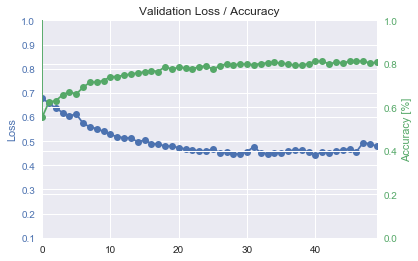

In [14]:
steps, loss, acc = zip(*history)

fig = plt.figure()
plt.title('Validation Loss / Accuracy')
ax_loss = fig.add_subplot(111)
ax_acc = ax_loss.twinx()
plt.xlabel('Training Steps')
plt.xlim(0, max(steps))

ax_loss.plot(steps, loss, '-o', color='C0')
ax_loss.set_ylabel('Loss', color='C0');
ax_loss.tick_params('y', colors='C0')
ax_loss.set_ylim(0.1, 1)

ax_acc.plot(steps, acc, '-o', color='C1')
ax_acc.set_ylabel('Accuracy [%]', color='C1');
ax_acc.tick_params('y', colors='C1')
ax_acc.set_ylim(0,1)

plt.show()

In [15]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    test_accuracy = evaluate(X_valid, y_valid)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.806
